### Import Libraries

In [1]:
#all the necessary libraries for this project
import pandas as pd
from decimal import Decimal
import ijson
import time
import csv
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from functions import *

from controller import functionality
from tabulate import tabulate
import seaborn as sns
import random
from visualizer import *

### Read dataset

In the chunk of code below we read the dataset getting the relevant informations.
Progress is shown every 48000 iterations

In [2]:
start = time.process_time()

PAPER = []
Author = []
count = 0

with open('./dblp.v12.json', "rb") as f, open("./output.csv", "w", newline="") as csvfile:
    fieldnames = ['id', 'title', 'year', 'author_name', 'author_org', 'author_id', 'n_citation', 'doc_type',
                  'reference_count', 'references', 'venue_id', 'venue_name', 'venue_type', 'doi', 'keyword','volume','issue','publisher',
                  'weight', 'indexed_keyword', 'inverted_index']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for i, element in enumerate(ijson.items(f, "item")):
        paper = {}
        paper['id'] = element['id']
        paper['title'] = element['title']

        year = element.get('year')
        if year:
            paper['year'] = year
        else:
            paper['year'] = np.nan

        author = element.get('authors')
        if author:
            Author = element['authors']
            author_name = []
            author_org = []
            author_id = []

            for i in Author:
                if 'name' in i and 'id' in i and 'org' in i:
                    author_name.append(str(i['name']))  # Convert to string
                    author_id.append(str(i['id']))
                    author_org.append(str(i['org']))
                else:
                    author_name.append(str(np.nan))  # Convert to string
                    author_id.append(str(np.nan))
                    author_org.append(str(np.nan))

            paper['author_name'] = ';'.join(author_name)
            paper['author_org'] = ';'.join(author_org)
            paper['author_id'] = ';'.join(author_id)

        n_citation = element.get('n_citation')
        if n_citation:
            paper['n_citation'] = n_citation
        else:
            paper['n_citation'] = np.nan

        doc_type = element.get('doc_type')
        if doc_type:
            paper['doc_type'] = doc_type
        else:
            paper['doc_type'] = np.nan

        references = element.get('references')
        if references:
            paper['reference_count'] = len(references)
            paper['references'] = ';'.join(str(int(r)) for r in references)
        else:
            paper['references'] = np.nan

        venue = element.get('venue')
        if venue:
            if 'id' in venue and 'raw' in venue and 'type' in venue:
                paper['venue_id'] = str(venue['id'])
                paper['venue_name'] = venue['raw']
                paper['venue_type'] = venue['type']
            else:
                paper['venue_id'] = np.nan
                paper['venue_name'] = np.nan
                paper['venue_type'] = np.nan
        else:
            paper['venue_id'] = np.nan
            paper['venue_name'] = np.nan
            paper['venue_type'] = np.nan

        doi = element.get('doi')
        if doi:
            paper['doi'] = f"https://doi.org/{doi}"
        else:
            paper['doi'] = np.nan

        fos = element.get('fos')
        if fos:
            fosunparsed = element['fos']
            keyword = []
            weight = []

            for i in fosunparsed:
                if isinstance(i['w'], (int, float, Decimal)):
                    keyword.append(str(i['name']))  # Convert to string
                    weight.append(str(i['w']))
                else:
                    keyword.append(str(np.nan))  # Convert to string
                    weight.append(str(np.nan))

        else:
            keyword = []
            weight = []

        paper['keyword'] = ';'.join(keyword)
        paper['weight'] = ';'.join(weight)

        
        publisher= element.get('publisher')
        if publisher:
            paper['publisher']=publisher
        else:
            paper['publisher']=np.nan
        
            
        count += 1
        writer.writerow(paper)

        if count % 48000 == 0:
            print(f"{count}:{round((time.process_time() - start), 2)}s ", end="")


48000:2.53s 96000:5.05s 144000:7.44s 192000:9.84s 240000:12.29s 288000:15.41s 336000:18.75s 384000:22.03s 432000:25.37s 480000:28.74s 528000:32.0s 576000:35.31s 624000:38.57s 672000:42.04s 720000:45.47s 768000:49.0s 816000:52.59s 864000:56.13s 912000:59.66s 960000:63.22s 1008000:66.75s 1056000:70.32s 1104000:73.87s 1152000:77.41s 1200000:80.93s 1248000:84.47s 1296000:88.02s 1344000:91.58s 1392000:95.13s 1440000:98.68s 1488000:102.26s 1536000:105.87s 1584000:109.45s 1632000:112.95s 1680000:116.48s 1728000:120.06s 1776000:123.61s 1824000:127.15s 1872000:130.7s 1920000:134.27s 1968000:137.86s 2016000:141.42s 2064000:145.02s 2112000:148.7s 2160000:152.38s 2208000:156.05s 2256000:159.71s 2304000:163.39s 2352000:167.04s 2400000:170.71s 2448000:174.37s 2496000:178.02s 2544000:181.71s 2592000:185.37s 2640000:189.07s 2688000:192.75s 2736000:196.4s 2784000:200.09s 2832000:203.75s 2880000:207.45s 2928000:211.01s 2976000:214.7s 3024000:218.15s 3072000:221.67s 3120000:225.29s 3168000:227.93s 321600

In [3]:
# Read the dataset in chunks since it's large
chunksize = 100000
chunk_list = []

start = time.process_time()

# Save it
chunks = pd.read_csv('./output.csv',chunksize=chunksize)

for chunk in chunks:
    chunk_list.append(chunk)

# Concat all chunks
output = pd.concat(chunk_list,ignore_index=True)

elapsed_time = time.process_time() - start
print(f"{elapsed_time} seconds")

39.69475399999999 seconds


In [4]:
# Sort the DataFrame based on the 'n_citation' column in descending order
df_sorted = output.sort_values(by='n_citation', ascending=False)

# Select the top 10,000 papers
df = df_sorted.head(10000)
# Save the df 
df.to_csv('./df.csv',index=False)

In [5]:
# Let's see how many missing values
df.isnull().sum()

id                     0
title                  0
year                   0
author_name          488
author_org           488
author_id            488
n_citation             0
doc_type             350
reference_count     1202
references          1202
venue_id             984
venue_name           984
venue_type           984
doi                 1549
keyword                1
volume             10000
issue              10000
publisher           1016
weight                 1
indexed_keyword    10000
inverted_index     10000
dtype: int64

As stated above, we retrieved only the relevant information meaning that we drop some columns from the df

In [6]:
df = df.drop(columns=['volume','issue','indexed_keyword','inverted_index'])

## QUESTION 1

### Graphs setup
Based on the available data, you will create two graphs to model our relationships as follows:

1. Citation graph: This graph should represent the paper's citation relationships. We want this graph to be unweighted and directed. The citation should represent the citation given from one paper to another. For example, if paper A has cited paper B, we should expect an edge from node A to B.

2. Collaboration graph: This graph should represent the collaborations of the paper's authors. This graph should be weighted and undirected. Consider an appropriate weighting scheme for your edges to make your graph weighted.



In [3]:
# Read the dataset
df = pd.read_csv('./df.csv')

In [7]:
# Total references
df['reference_count'].sum()

187945.0

In [9]:
df.dtypes

id                   int64
title               object
year               float64
author_name         object
author_org          object
author_id           object
n_citation         float64
doc_type            object
reference_count    float64
references          object
venue_id           float64
venue_name          object
venue_type          object
doi                 object
keyword             object
publisher           object
weight              object
dtype: object

### Citation graph

As stated from the Homework:

- We decide to consider each of the papers as our nodes, meaning we have 10000 different nodes
- We decide to consider only the citation relationship between these 10,000 papers and ignore the rest.

In [10]:
# Create a directed and unweighted graph
citation_graph = nx.DiGraph()

# Add nodes to the graph from id
citation_graph.add_nodes_from(df['id'])

# Iterate through DataFrame and add edges to the graph
for index, row in df.iterrows():
    paper_id = row['id']

    references = str(row['references'])
    
    # Check for NaN or empty string
    if references and references != 'nan':
        references = references.split(';')

        # Add edges to the graph
        for reference in references:
            # Check that the reference is inside the df, ignore the rest
            if int(reference) in df['id'].values:
                citation_graph.add_edge(paper_id, int(reference))


In [11]:
print(len(citation_graph.nodes))
print(len(citation_graph.edges))

10000
52289


#### The graph is large so we decided to plot the strongly connected components

In [12]:
# Get all strongly connected components
strongly_connected_components = nx.strongly_connected_components(citation_graph)

# Find the largest strongly connected component to visualize
largest_component = max(strongly_connected_components, key=len)

# Create a subgraph
citation_subgraph = citation_graph.subgraph(largest_component)

In [25]:
print(len(citation_subgraph.nodes))
print(len(citation_subgraph.edges))

56
238


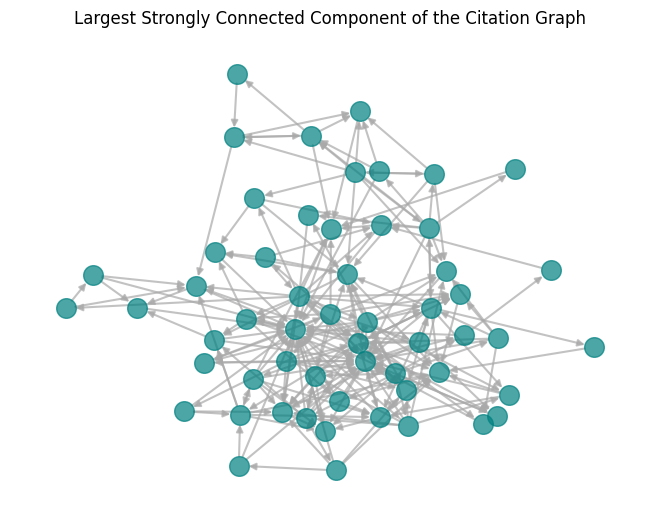

In [14]:
# Plot it
pos = nx.kamada_kawai_layout(citation_subgraph) 


node_color = 'teal'
edge_color = 'darkgray' 
node_size = 200
edge_width = 1.5

# Draw nodes and edges 
nx.draw(citation_subgraph, pos, with_labels=False, node_color=node_color, node_size=node_size, edge_color=edge_color, width=edge_width, alpha=0.7)

# Draw 
plt.title("Largest Strongly Connected Component of the Citation Graph")
plt.axis('off') 
plt.show()


In [15]:
# Save graph
nx.write_graphml(citation_graph, 'citation_graph.graphml')

### Collaboration Graph

As stated from the Homework:

- We decide to consider the authors of these papers as our nodes
- We decide to consider only the collaborations between the authors of these 10,000 papers and ignore the rest.
- As for the weight, we have decided to use the occurencies of the collaboration, meaning that if two authors have collaborated (for example) 5 times, the weight will be 5

In [16]:
df.columns

Index(['id', 'title', 'year', 'author_name', 'author_org', 'author_id',
       'n_citation', 'doc_type', 'reference_count', 'references', 'venue_id',
       'venue_name', 'venue_type', 'doi', 'keyword', 'publisher', 'weight'],
      dtype='object')

In [17]:
# Create an undirected weighted graph for collaboration
collaboration_graph = nx.Graph()

# ADD NODES
# Create Series with only author IDs
authors = df['author_name'].str.split(';').explode().dropna()
collaboration_graph.add_nodes_from(authors)
collaboration_graph.remove_node('nan')

# ADD edges
# Iterate through DataFrame and add edges to the graph
for index, row in df.iterrows():
    authors_ids= str(row['author_name'])
    
    # Check for NaN or empty string
    if authors_ids and authors_ids != 'nan':
        authors_ids = authors_ids.split(';')

        # Create all possible pairs of authors and update weights
        for i, author1 in enumerate(authors_ids):
            for j, author2 in enumerate(authors_ids[i + 1:]):

                # Check that authors are inside the df, ignore the rest
                if author1 in collaboration_graph.nodes and author2 in collaboration_graph.nodes:
                    # Increment edge weight if collaboration exists else create a new edge
                    if collaboration_graph.has_edge(author1, author2):
                        collaboration_graph[author1][author2]['weight'] += 1
                        collaboration_graph[author1][author2]['titles'] = row['title']  # store title attribute
                    else:
                        collaboration_graph.add_edge(author1, author2, weight=1)
                        collaboration_graph[author1][author2]['titles'] = row['title'] # store title attribute

In [18]:
print(len(collaboration_graph.nodes))
print(len(collaboration_graph.edges))

18399
53272


In [20]:
# Get all connected components
connected_components = list(nx.connected_components(collaboration_graph))

# Find the largest connected component
largest_component = max(connected_components, key=len)

# Create a subgraph from the largest connected component
collaboration_subgraph = collaboration_graph.subgraph(largest_component)

In [19]:
# Save graph
nx.write_graphml(collaboration_graph, 'collaboration_graph.graphml')

## 2. Controlling system

In [2]:
#load the graphs which were previously saved
G1 = nx.read_graphml('citation_graph.graphml')
G2= nx.read_graphml('collaboration_graph.graphml')

### 2.1. Backend Implementation

All the functionalities related to the Backend have been deployed in the controller.py and functionality.py

### 2.2. Frontend Implementation

**Functionality 1: Visualize graph features**

A table containing the following general information about the graph:
Number of nodes in the graph
Number of the edges in the graph
Density of the graph
Average degree of the graph
Whether the network is sparse or dense
A table that lists the graph's hubs
A plot depicting the distribution of the citations received by papers (Citation graph)
A plot depicting the distribution of the given citations by papers (Citation graph)
A plot depicting the number of collaborations of the author (Collaboration graph)

In [ ]:
graph_name, num_nodes, num_edges, density, degree_distribution, average_degree, hubs, graph_type = functionality(1, G1, graph_name='citation_graph')

In [ ]:
table = [['Name of Graph', graph_name],['Number of nodes in the Graph', num_nodes],['Number of edges in the Graph', num_edges],\
          ['Density of the Graph', density],['Average degree of the Graph',average_degree],["The Graph is", graph_type]]
print(tabulate(table, tablefmt='grid',numalign="right"))

+------------------------------+-----------------------+
| Name of Graph                | citation_graph        |
+------------------------------+-----------------------+
| Number of nodes in the Graph | 10000                 |
+------------------------------+-----------------------+
| Number of edges in the Graph | 52289                 |
+------------------------------+-----------------------+
| Density of the Graph         | 0.0005229422942294229 |
+------------------------------+-----------------------+
| Average degree of the Graph  | 10.4578               |
+------------------------------+-----------------------+
| The Graph is                 | sparse                |
+------------------------------+-----------------------+


In [ ]:
table=list(hubs)
tab=[[i,table[i]] for i in range(len(table))][:51]
print(tabulate(tab,tablefmt='github',headers=["ID","Network's hubs"]))

|   ID |   Network's hubs |
|------|------------------|
|    0 |       2041404167 |
|    1 |       1639032689 |
|    2 |       2912565176 |
|    3 |       2151103935 |
|    4 |       2911964244 |
|    5 |       2153635508 |
|    6 |       2156909104 |
|    7 |       1791587663 |
|    8 |       2119821739 |
|    9 |       1995875735 |
|   10 |       2145023731 |
|   11 |       2161969291 |
|   12 |       1880262756 |
|   13 |       1686810756 |
|   14 |       2121863487 |
|   15 |       2011039300 |
|   16 |       2163605009 |
|   17 |       2132984323 |
|   18 |       2064675550 |
|   19 |       2125055259 |
|   20 |       2085261163 |
|   21 |       2296616510 |
|   22 |       2169528473 |
|   23 |       2194775991 |
|   24 |       1667165204 |
|   25 |       2100379340 |
|   26 |       2104095591 |
|   27 |       2173213060 |
|   28 |       2159080219 |
|   29 |       2139212933 |
|   30 |       2124637492 |
|   31 |       1480376833 |
|   32 |       2912934387 |
|   33 |       21454

In [ ]:
graph_name2, num_nodes2, num_edges2, density2, degree_distribution2, average_degree2, hubs2, graph_type2 = functionality(1, G2, graph_name='collaboration_graph')

In [ ]:
table2 = [['Name of Graph', graph_name2], ['Number of nodes in the Graph', num_nodes2],['Number of edges in the Graph', num_edges2],\
          ['Density of the Graph', density2],['Average degree of the Graph',average_degree2],["The Graph is", graph_type2]]
print(tabulate(table2, tablefmt='grid',numalign="right"))

+------------------------------+-----------------------+
| Name of Graph                | collaboration_graph   |
+------------------------------+-----------------------+
| Number of nodes in the Graph | 18399                 |
+------------------------------+-----------------------+
| Number of edges in the Graph | 53272                 |
+------------------------------+-----------------------+
| Density of the Graph         | 0.0003147488584223984 |
+------------------------------+-----------------------+
| Average degree of the Graph  | 5.790749497255286     |
+------------------------------+-----------------------+
| The Graph is                 | sparse                |
+------------------------------+-----------------------+


In [ ]:
table2=list(hubs2)
tab=[[i,table2[i]] for i in range(len(table2))][:51]
print(tabulate(tab,tablefmt='github',headers=["ID","Network's hubs"]))

|   ID | Network's hubs      |
|------|---------------------|
|    0 | Andrew Y. Ng        |
|    1 | Michael I. Jordan   |
|    2 | Ilya Sutskever      |
|    3 | Jeffrey Dean        |
|    4 | Sanjay Ghemawat     |
|    5 | Yoshua Bengio       |
|    6 | Li Fei-Fei          |
|    7 | Ion Stoica          |
|    8 | Robert Morris       |
|    9 | Hari Balakrishnan   |
|   10 | David Warde-Farley  |
|   11 | David A. Maltz      |
|   12 | Ron Edgar           |
|   13 | Thomas L. Madden    |
|   14 | Tugba O. Suzek      |
|   15 | Tatiana A. Tatusova |
|   16 | Scott Shenker       |
|   17 | Nick McKeown        |
|   18 | Jennifer Rexford    |
|   19 | Alex J. Smola       |
|   20 | Bernhard Schölkopf  |
|   21 | Dan Boneh           |
|   22 | Paul Barham         |
|   23 | Guang-Bin Huang     |
|   24 | Andrew Zisserman    |
|   25 | Qiang Yang          |
|   26 | Jason Weston        |
|   27 | Koray Kavukcuoglu   |
|   28 | David Silver        |
|   29 | Alex Graves         |
|   30 |

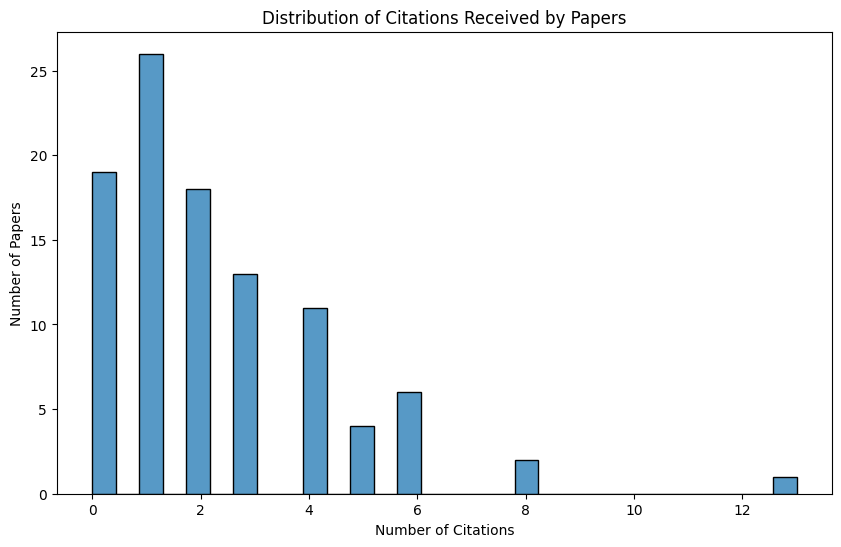

In [ ]:
N=100
# Calculate the degree centrality for each node and select the top N nodes
degree_centrality = nx.degree_centrality(G1)
top_N_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:N]

# Create a subgraph with the top N nodes
G_top_N = G1.subgraph(top_N_nodes)
# Calculate the number of citations each paper received
citation_counts = [d for n, d in G_top_N.in_degree()]

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(citation_counts, bins=30, kde=False)
plt.title('Distribution of Citations Received by Papers')
plt.xlabel('Number of Citations')
plt.ylabel('Number of Papers')
plt.show()

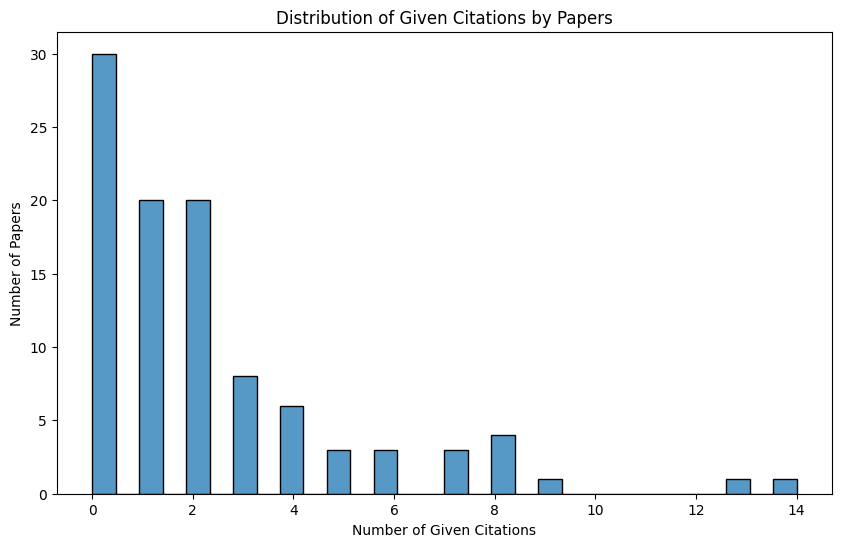

In [ ]:
N=100
# Calculate the degree centrality for each node and select the top N nodes
degree_centrality = nx.degree_centrality(G1)
top_N_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:N]

# Create a subgraph with the top N nodes
G_top_N = G1.subgraph(top_N_nodes)
given_citation_counts = [d for n, d in G_top_N.out_degree()]

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(given_citation_counts, bins=30, kde=False)
plt.title('Distribution of Given Citations by Papers')
plt.xlabel('Number of Given Citations')
plt.ylabel('Number of Papers')
plt.show()

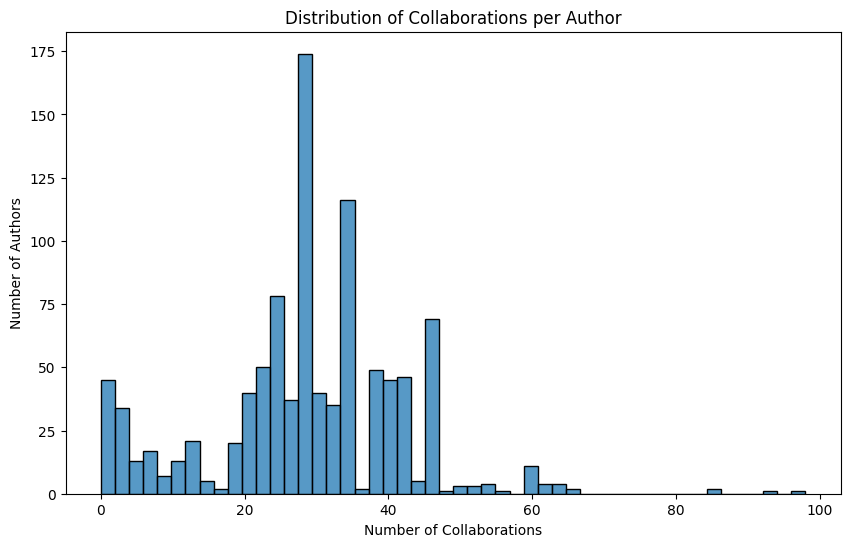

In [ ]:
N=1000
# Calculate the degree centrality for each node and select the top N nodes
degree_centrality = nx.degree_centrality(G2)
top_N_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:N]

# Create a subgraph with the top N nodes
G_top_N = G2.subgraph(top_N_nodes)
# Calculate the number of collaborations each author has
collaboration_counts = [d for n, d in G_top_N.degree()]
# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(collaboration_counts, bins=50, kde=False)
plt.title('Distribution of Collaborations per Author')
plt.xlabel('Number of Collaborations')
plt.ylabel('Number of Authors')
plt.show()

**Functionality 2 and Visualization 2 - Visualize the node's contribution**

A table containing the node's centrality value based on the four centrality measurements

In [ ]:
graph_name, node, betweenness, pagerank, closeness, degree_centrality= functionality(2, G1, node='2041404167', graph_name='citation_graph')

In [ ]:
mean_centrality = (betweenness+pagerank+closeness+degree_centrality)/4

In [ ]:
table = [['Name of Graph', graph_name], ['Concerned Node', node],['Betweenness Centrality', betweenness],\
          ['pagerank', pagerank],['Closeness Centrality',closeness],["degree centrality", degree_centrality], ["Mean centrality", mean_centrality]]
print(tabulate(table, tablefmt='grid',numalign="right"))

+------------------------+----------------------+
| Name of Graph          | citation_graph       |
+------------------------+----------------------+
| Concerned Node         | 2041404167           |
+------------------------+----------------------+
| Betweenness Centrality | 0.0                  |
+------------------------+----------------------+
| pagerank               | 0.004563910788700084 |
+------------------------+----------------------+
| Closeness Centrality   | 0.118412457649229    |
+------------------------+----------------------+
| degree centrality      | 0.009500950095009501 |
+------------------------+----------------------+
| Mean centrality        | 0.03311932963323465  |
+------------------------+----------------------+


In [ ]:
list(G2.nodes)[:10]

['C. E. Shannon',
 'David G. Lowe',
 'Leo Breiman',
 'David W. Hosmer',
 'Chih-Chung Chang',
 'Chih-Jen Lin',
 'Vladimir N. Vapnik',
 'Fred D. Davis',
 'Corinna Cortes',
 'Vladimir Vapnik']

In [ ]:
graph_name, node, betweenness, pagerank, closeness, degree_centrality= functionality(2, G2, node='Vladimir Vapnik', graph_name='collaboration_graph')

In [ ]:
mean_centrality = (betweenness+pagerank+closeness+degree_centrality)/4

In [ ]:
table = [['Name of Graph', graph_name], ['Concerned Node', node],['Betweenness Centrality', betweenness],\
          ['pagerank', pagerank],['Closeness Centrality',closeness],["degree centrality", degree_centrality], ["Mean centrality", mean_centrality]]
print(tabulate(table, tablefmt='grid',numalign="right"))

+------------------------+------------------------+
| Name of Graph          | collaboration_graph    |
+------------------------+------------------------+
| Concerned Node         | Vladimir Vapnik        |
+------------------------+------------------------+
| Betweenness Centrality | 0.0004346374804976461  |
+------------------------+------------------------+
| pagerank               | 0.00020846827505755853 |
+------------------------+------------------------+
| Closeness Centrality   | 0.0302877088508847     |
+------------------------+------------------------+
| degree centrality      | 0.0011414284161321883  |
+------------------------+------------------------+
| Mean centrality        | 0.008018060755643023   |
+------------------------+------------------------+


**Functionality 3, Visualization 3 - Visualize the shortest-ordered route**

Print the papers needed to be crossed in the shortest walk in order
Plot the graph and identify the nodes and edges that appear in the shortest walk (please put an identifier on each edge in the shortest walk to determine the order that we should have the walk)

In [ ]:
N=5
# Calculate the degree centrality for each node and select the top N nodes
degree_centrality = nx.degree_centrality(G2)
top_N_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:N]

# Create a subgraph with the top N nodes
G_top_N = G2.subgraph(top_N_nodes)

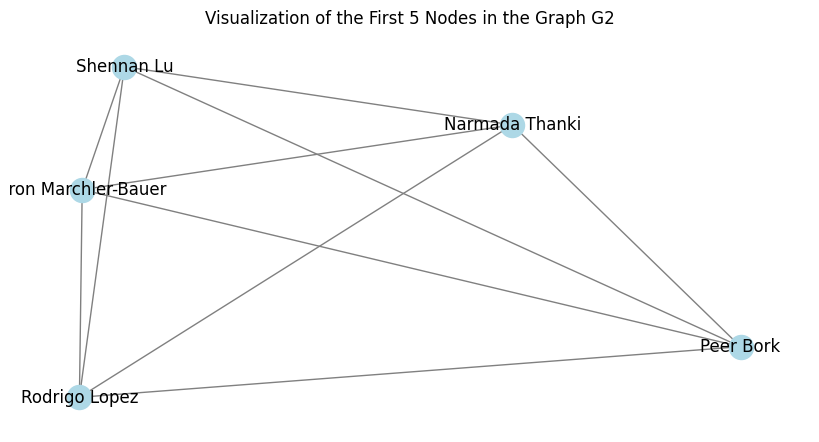

In [ ]:
# Visualize the first N nodes of the graph G2
plt.figure(figsize=(8, 4))
nx.draw(G_top_N, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title(f"Visualization of the First {N} Nodes in the Graph G2")
plt.show()

In [ ]:
top_N_nodes

['Rodrigo Lopez',
 'Aron Marchler-Bauer',
 'Peer Bork',
 'Shennan Lu',
 'Narmada Thanki']

In [ ]:
authors_a = ['Peer Bork', 'Aron Marchler-Bauer']
a_1 = 'Rodrigo Lopez'
a_n = 'Narmada Thanki'
N = 5
result = functionality(3, G2, authors_a=authors_a, a_1=a_1, a_n=a_n, N=N)
print(result)

(['Rodrigo Lopez', 'Peer Bork', 'Aron Marchler-Bauer', 'Narmada Thanki'], 3)


As I have used brute-force algorithm to get the path, it is often not an efficient algorithm, a better choice can be Breadth First Search algorithm. Here I attach the result by the ChatGPT implementation:

In [3]:
from functionality import func3_GPT
authors_a = ['Peer Bork', 'Aron Marchler-Bauer']
a_1 = 'Rodrigo Lopez'
a_n = 'Narmada Thanki'
N = 5
result2 = func3_GPT(G2, authors_a, a_1, a_n, N)
print(result2)

(['Rodrigo Lopez', 'Peer Bork', 'Aron Marchler-Bauer', 'Narmada Thanki'], 3)


As we can see, the two results are identical, hence the implemented algorithm is correct.

**Checking Correctness of the Algorithm:**

Termination:

The BFS algorithm explores nodes level by level.
The queue ensures that each node is processed once, and the visited set prevents cycles by ensuring we don't process a node more than once.
Since the graph has a finite number of nodes, and each node is enqueued only once, the algorithm will process a finite number of nodes and thus terminate.
Soundness:

The algorithm starts at the initial node a_1 and enqueues neighbors systematically, exploring paths breadth-first.
It keeps track of the path and the index in authors_a. When a node is the next required author, it increments the index, ensuring we're visiting authors in the correct order.
If it reaches the end node a_n and has visited all required authors in order (index == len(authors_a)), it returns the path. This path is the shortest by the nature of BFS, which explores all shorter paths before longer ones.
Therefore, if it finds a path, that path is guaranteed to be the shortest path that visits the required authors in order.

Completeness:

The algorithm explores all possible paths from the start node to the end node that could potentially visit all required authors in order.
If a path exists that visits all required authors in order and ends at a_n, the algorithm will eventually find it because it systematically explores all possibilities.
If no such path exists, the algorithm will eventually exhaust all possibilities and return "There is no such path."

Potential Issues and Limitations:

Complexity: While BFS is generally efficient, the worst-case time complexity can be high for large graphs, especially if many paths involve visiting the same nodes in different orders. This implementation could be improved with more sophisticated pruning strategies.
Ambiguity in Path Existence: If the graph changes between runs or is directed and doesn't allow for the necessary traversal, the algorithm might not find a path. Ensuring the graph is static and appropriately directed (or undirected) is crucial.

Specificity to Problem Definition: The algorithm assumes a specific problem structure (a graph with nodes representing authors and edges representing collaborations). If the real-world application deviates from this structure, the algorithm might not perform as expected.

In [ ]:
shortest_path, _ = result

# Retrieve the papers for the shortest walk
papers_in_walk = get_papers_for_shortest_walk(G2, shortest_path)

# Print the papers in order
print("Papers needed to be crossed in the shortest walk:")
for i, (start, end, paper) in enumerate(papers_in_walk, 1):
    print(f"{i}. Between {start} and {end}: Paper: {paper}")

Papers needed to be crossed in the shortest walk:
1. Between Rodrigo Lopez and Peer Bork: Paper: InterPro in 2017—beyond protein family and domain annotations
2. Between Peer Bork and Aron Marchler-Bauer: Paper: InterPro in 2017—beyond protein family and domain annotations
3. Between Aron Marchler-Bauer and Narmada Thanki: Paper: CDD: conserved domains and protein three-dimensional structure


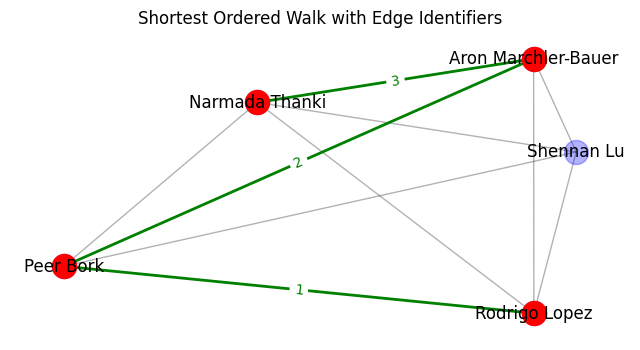

In [ ]:
plot_shortest_walk(G_top_N, result[0])

**Functionality 4 and Visualization 4 - Visualize the disconnected graph**

Print the number of the links that should be disconnected

Plot the original graph

Plot the graph after removing the links and identify the two nodes

In [ ]:
authorA = 'Rodrigo Lopez'  
authorB = 'Narmada Thanki'  
N = 5  # The top N authors to consider

num_edges_to_disconnect, separating_edges, resulting_graph = functionality(4, G2, source=authorA,sink=authorB, top_n=N)

print(f"Minimum number of edges to disconnect {authorA} and {authorB}: {num_edges_to_disconnect}")
print(f"Edges separated: {separating_edges}")

Minimum number of edges to disconnect Rodrigo Lopez and Narmada Thanki: 4
Edges separated: [('Rodrigo Lopez', 'Peer Bork'), ('Rodrigo Lopez', 'Aron Marchler-Bauer'), ('Rodrigo Lopez', 'Shennan Lu'), ('Rodrigo Lopez', 'Narmada Thanki')]


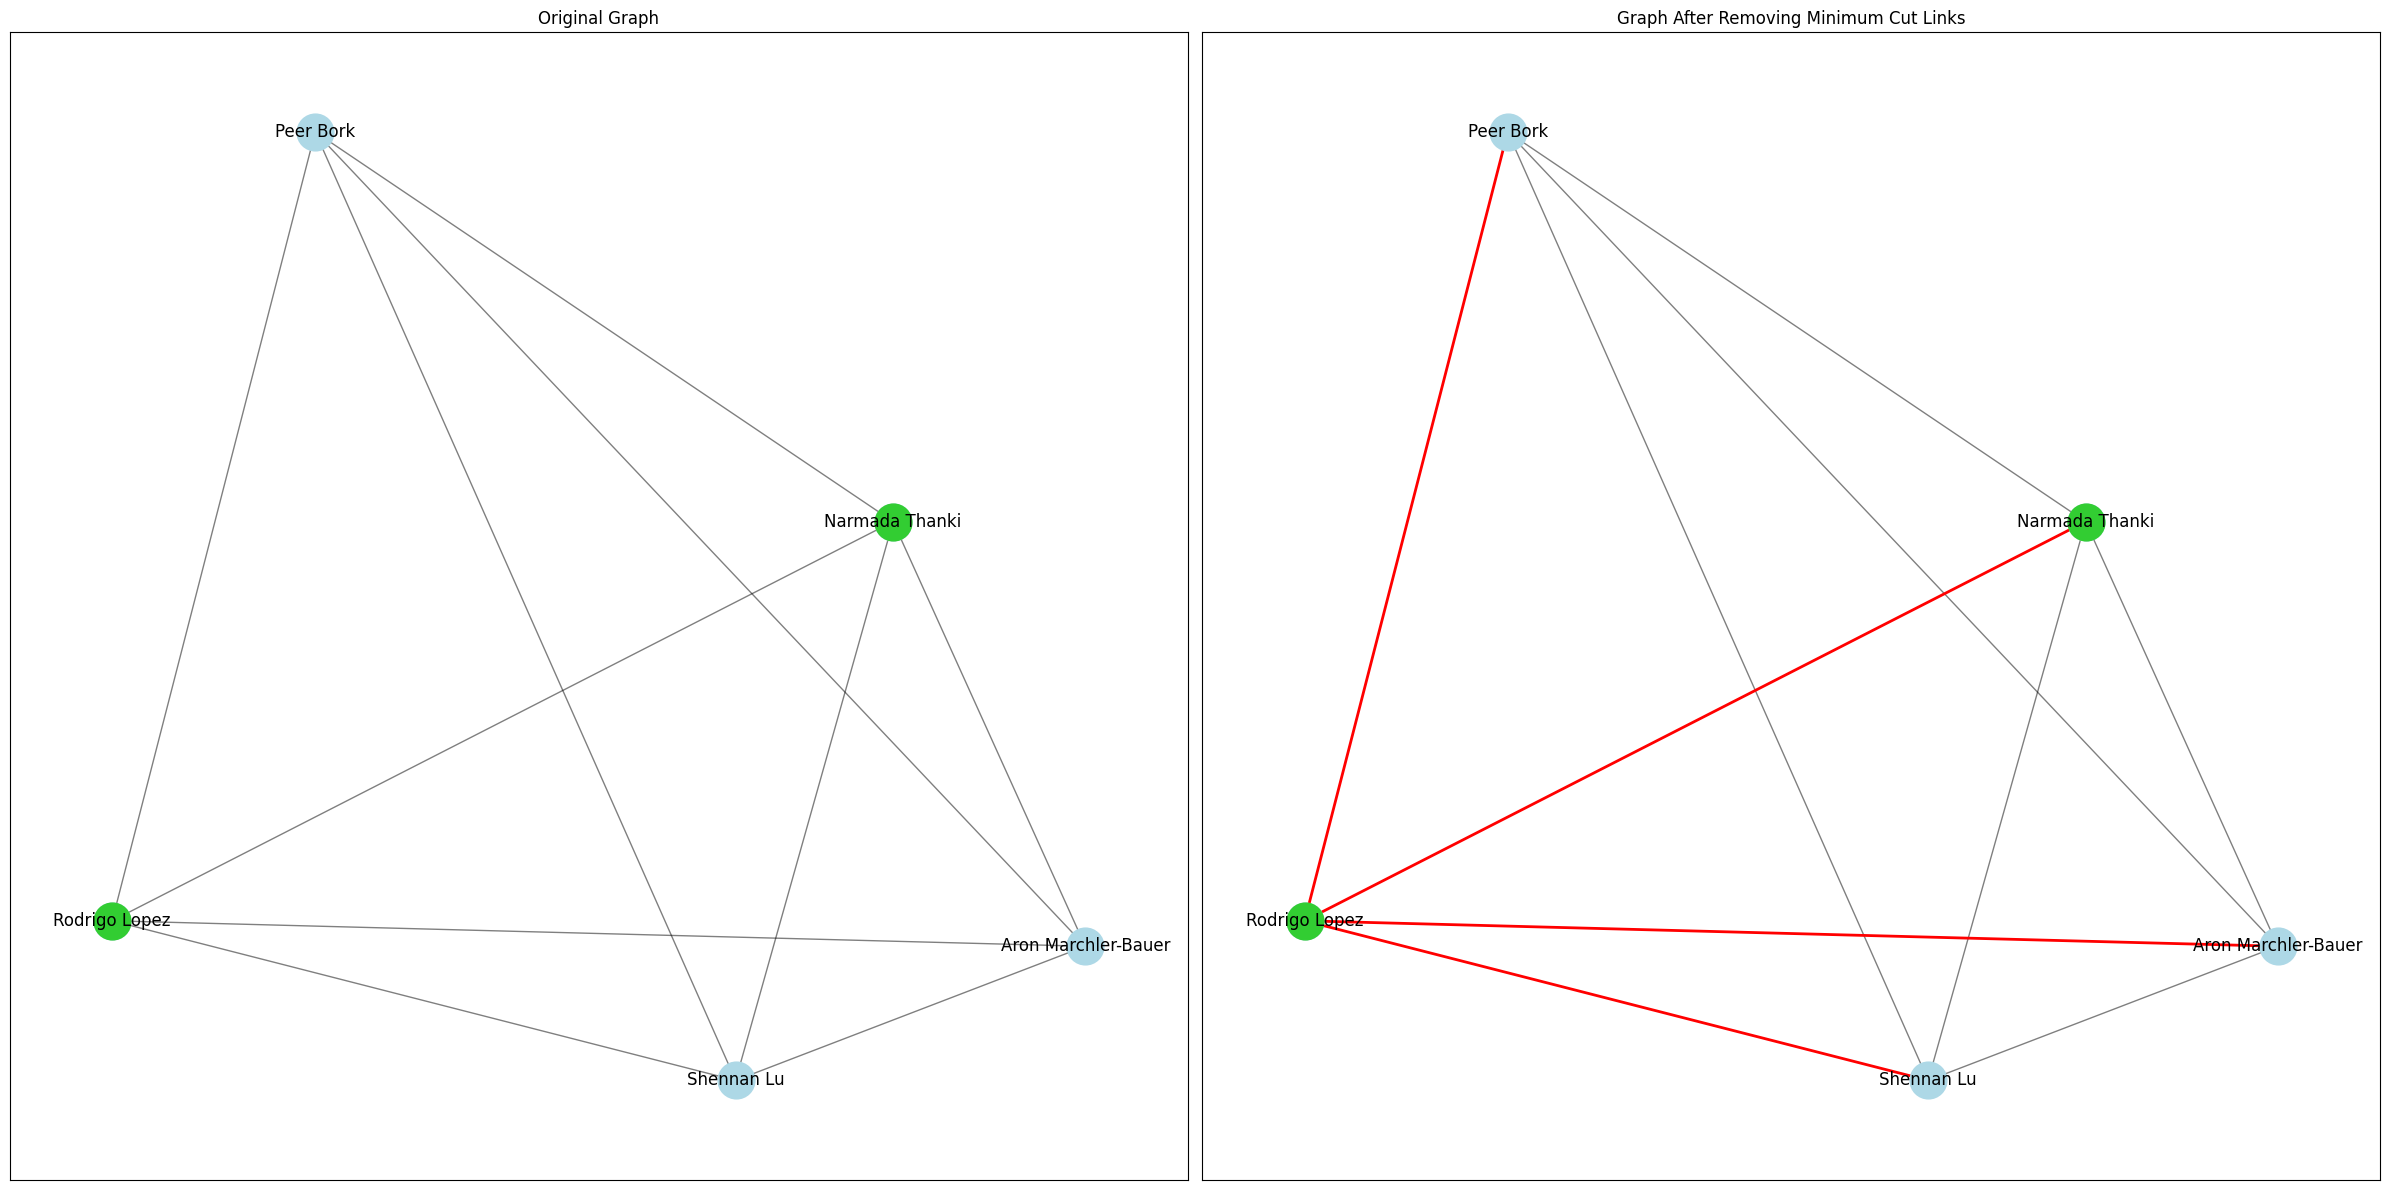

In [ ]:
plot_graphs(G_top_N, resulting_graph, authorA, authorB, separating_edges)

**Functionality 5 & Visualization 5 - Visualize the communities**

Print the number of links that should be removed to have the communities

A table depicting the communities and the papers that belong to each community

Plot the original graph

Plot the graph showing the communities in the network

Plot the final graph and identify the community/communities of Paper_1 and Paper_2

In [ ]:
G_undirected = G1.to_undirected()
# Calculate the degree centrality for each node and select the top N nodes
degree_centrality = nx.degree_centrality(G_undirected)
top_N_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:50]
random.seed(50)
paper1, paper2 = random.sample(top_N_nodes, 2)

In [ ]:
print(f'paper1: {paper1} and paper2: {paper2}')

paper1: 2100408980 and paper2: 2147152072


In [ ]:
result = functionality(5, G1, N=50, paper1='2100408980', paper2='2147152072')
print(result)

{'community_of_paper_1': 17, 'community_of_paper_2': 13, 'same_community': False, 'total_communities': 50, 'min_edges_removed': 82, 'final_communities': ({'2119821739'}, {'2096525273'}, {'2618530766'}, {'1986931325'}, {'1880262756'}, {'1987198869'}, {'1506845741'}, {'1660562555'}, {'2147800946'}, {'2130509920'}, {'2162915993'}, {'2296616510'}, {'1639032689'}, {'2147152072'}, {'2141885858'}, {'2156909104'}, {'1791587663'}, {'2100408980'}, {'2150341604'}, {'1501500081'}, {'2165949425'}, {'2159080219'}, {'2121947440'}, {'2031489346'}, {'2161969291'}, {'2072128103'}, {'1988790447'}, {'1971784203'}, {'2102605133'}, {'1956559956'}, {'2148251644'}, {'2164598857'}, {'2041404167'}, {'2151103935'}, {'2125055259'}, {'2115167851'}, {'2156186849'}, {'2076063813'}, {'1655990431'}, {'2124386111'}, {'1995903777'}, {'2108598243'}, {'1996360405'}, {'2157457404'}, {'2168356304'}, {'2912934387'}, {'2163922914'}, {'2117539524'}, {'47957325'}, {'2163605009'})}


In [ ]:
print(f'The number of links that should be removed to have the communities: '+ str(result['min_edges_removed']))

The number of links that should be removed to have the communities: 82


In [ ]:
print_communities_table(result['final_communities'])

    Community      Papers
0           0  2119821739
1           1  2096525273
2           2  2618530766
3           3  1986931325
4           4  1880262756
5           5  1987198869
6           6  1506845741
7           7  1660562555
8           8  2147800946
9           9  2130509920
10         10  2162915993
11         11  2296616510
12         12  1639032689
13         13  2147152072
14         14  2141885858
15         15  2156909104
16         16  1791587663
17         17  2100408980
18         18  2150341604
19         19  1501500081
20         20  2165949425
21         21  2159080219
22         22  2121947440
23         23  2031489346
24         24  2161969291
25         25  2072128103
26         26  1988790447
27         27  1971784203
28         28  2102605133
29         29  1956559956
30         30  2148251644
31         31  2164598857
32         32  2041404167
33         33  2151103935
34         34  2125055259
35         35  2115167851
36         36  2156186849
37         3

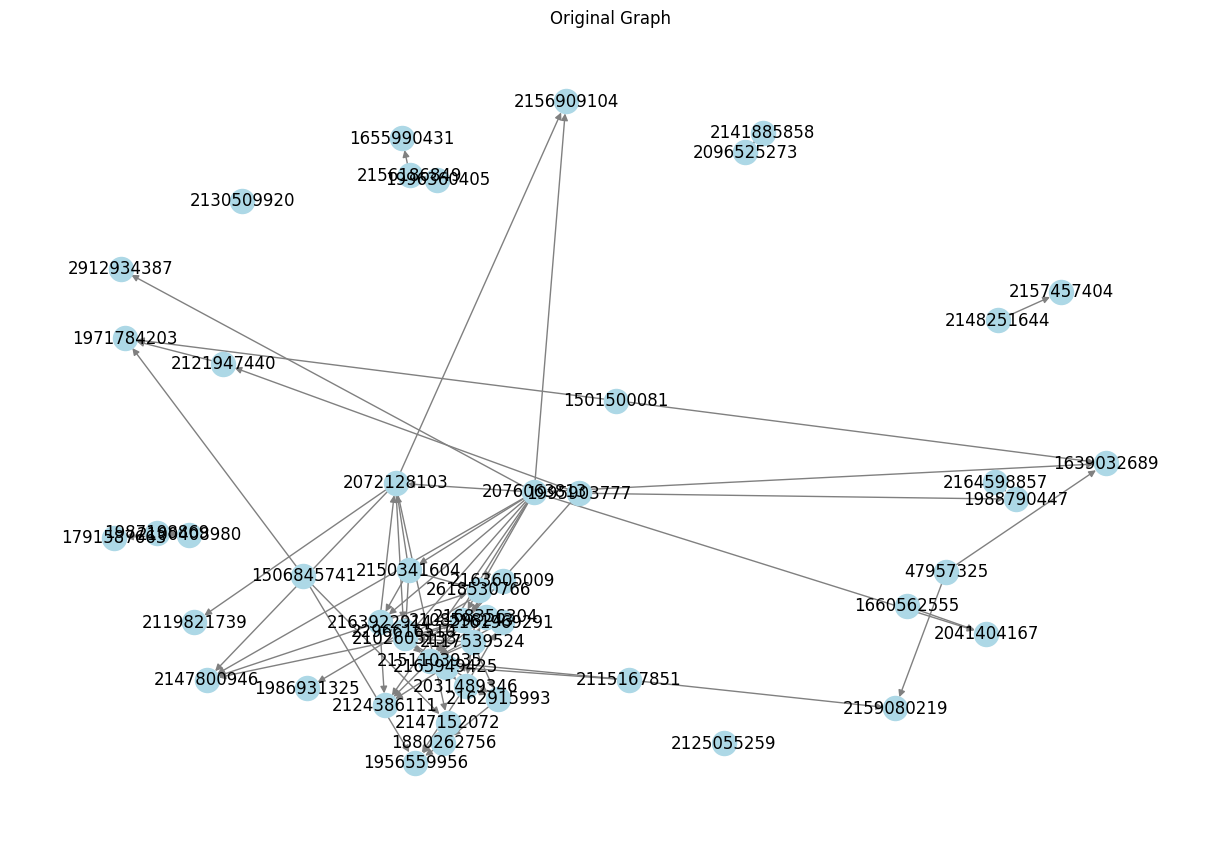

In [ ]:
plot_original_graph(G1.subgraph(top_N_nodes))

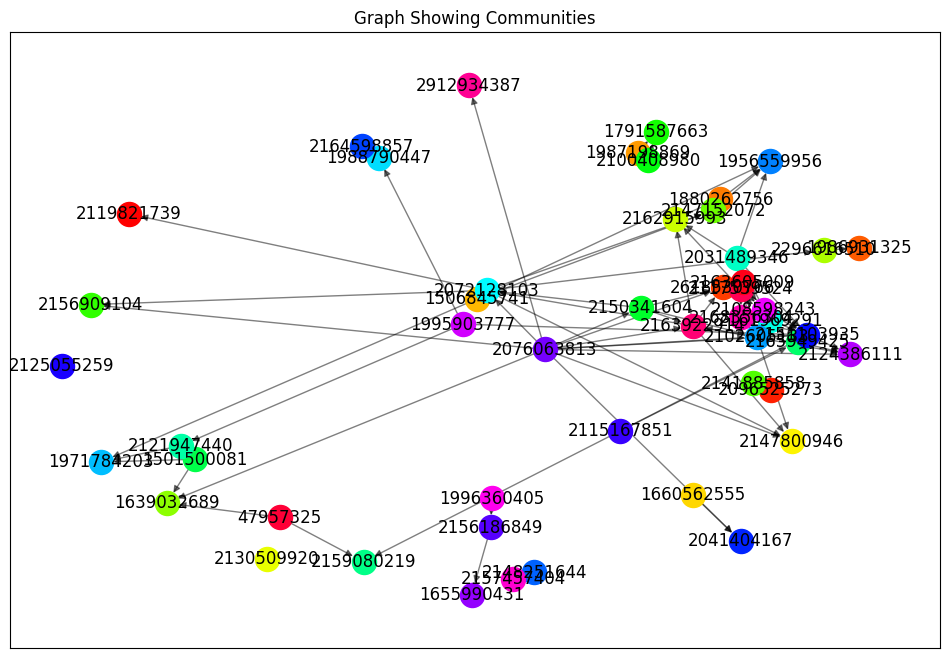

In [ ]:
plot_graph_with_communities(G1.subgraph(top_N_nodes), result['final_communities'])

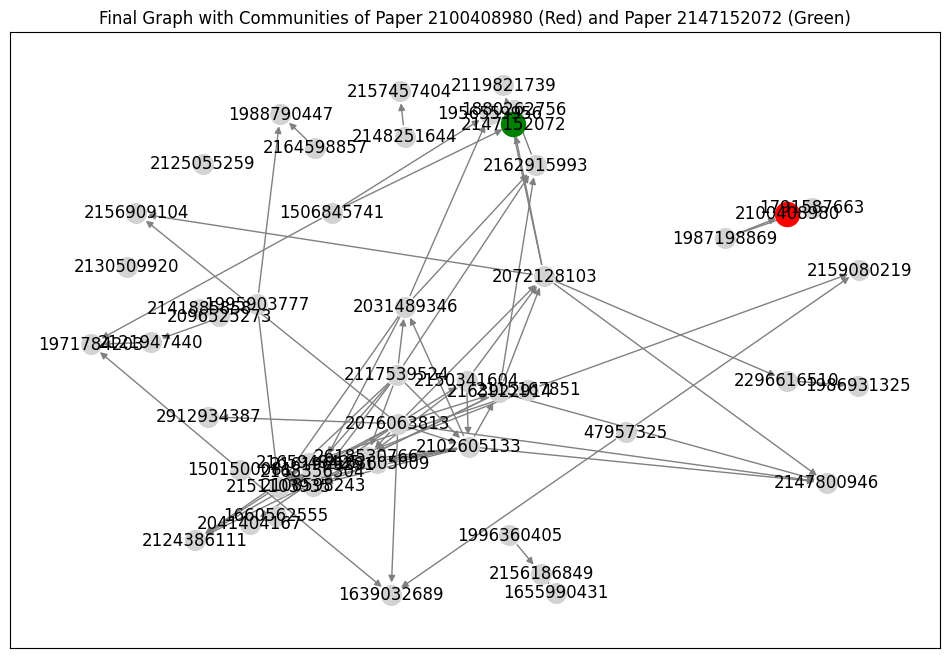

In [ ]:
plot_final_graph_and_identify_papers(G1.subgraph(top_N_nodes), result['final_communities'], paper1, paper2)

5. Algorithmic Questions (AQ)

Part A

In the next box i will introduce the function of the algorithm, and in the 2 after that i will use 2 box for the 2 input

In [3]:
#Define the score function that will calculate the value of the team 
def Score(dictionary): #Total cost O(m*nlog(n))
    
    #Initialitation
    total=0 #O(1)
    
    #extracting value from the dictionary
    for key, values_list in dictionary.items(): #O(m) m is the lenght of the dictionary
        
    # Check if the skill is request
        if key in count:
            
        # we see how many elements we need of each skill
            k = count[key] #O(1) 
            
        # reorder
            sorted_values = sorted(values_list, reverse=True)# O(alog(a)) where a is the lenght of each value list, we can upperbound it with O(nlog(n))
        
        # Extract first k elements
            extracted_elements = sorted_values[:k] #O(k)
            total+=sum(extracted_elements)#O(1)
            
    return(total)

#division in 2 case
def TeamScore(team):
    if S==1:
        dictionary_reordered={} #initialization O(1)
    
    #extracting value from the dictionary to change his form
        for keys, value in team.items(): #O(m) m is the lenght of the dictionary
        
    # taking each element for the keys
            word_key = list(value.keys())[0] #O(1)
    
    # value for the key
            number_value = value[word_key] #O(1)
    
    # Adding elements in the dictionary
            if word_key in dictionary_reordered: #O(1)
                dictionary_reordered[word_key].append(number_value)#O(1)
            else:
                dictionary_reordered[word_key] = [number_value]#O(1)
    
    #applying the function
        result=Score(dictionary_reordered) #O(m*nlog(n))
        print(result) #O(1)
    
    
#if S!= 1    
    else:
    #we can think for all the possibile choice of the athlete like a binary code, 0 if i take the first skill and 1 if i take the second
    #the calculation of all the possibilities has O(2^n)
    
        combination=[]#O(1)
    
        for i in range(2**N): #this is the passage that cost more O(2^n)
            binary_num=bin(i)[2:].zfill(N)
            binary_list=[int(element) for element in binary_num]
            combination.append(binary_list)
        
    #initialization of the maximum value
        maximum=0 #O(1)
    
    #changing form of the dictionary to a list to have an easyer access to it
        element_team=team.items()# O(1)
        element_team=list(element_team)# O(1)
    
        for j in range(len(combination)): #O(m) 
        
        #we choose a combination
            a=combination[j]# O(1)
        
        #we create a temporary dictionary to store our choice
            temp={}# O(1)
        
        #we iterate trough the dictionary and the vector a so we can pick the first or the second skill for each athlete
            for i in range(len(a)): #O(h) h is the len(a)

                single=element_team[i][1]# O(1)

                key, value = list(single.items())[a[i]]# O(1)
                if key in temp:# O(1)
                    temp[key].append(value)# O(1)
                else:
                    temp[key] = [value]# O(1)
                
 #now we have our dictionary that has all the choices, we calculate his score and then check if it's higher or not of the maximum   

            b=Score(temp)#O(m*nlog(n))

            maximum=max(maximum,b)# O(1)
        print(maximum)# O(1)

In [5]:
#S=1
from collections import Counter
N,M,S=map(int,input().split()) #N=Pool , M=choosen, S=number of skill for each O(1)
skills_need=input().split() #(M)
count=Counter(skills_need) #the the counter is an access of each element of the dictionary so it's algoritmic cost is O(M)
candidates = {}
#total operation of the input is N(S+1) so is O(N)
for i in range(N):
    athlete_id = int(input()) 
    skills = {}
    for _ in range(S): #i am using this type of dictionary for the input
        skill, score = input().split()
        skills[skill] = int(score)
    candidates[athlete_id] = skills
    
TeamScore(candidates)

14 10 1
SWM VOL ATH VOL VOL BSK HCK BSK SWM BSK
1
BSK 98
2
ATH 14
3
HCK 82
4
HCK 9
5
FTB 90
6
ATH 52
7
HCK 95
8
TEN 85
9
RGB 46
10
SWM 16
11
VOL 32
12
SOC 41
13
SWM 59
14
SWM 34
370


In [6]:
#S=2
from collections import Counter
N,M,S=map(int,input().split()) #N=Pool , M=choosen, S=number of skill for each O(1)
skills_need=input().split() #(M)
count=Counter(skills_need) #the the counter is an access of each element of the dictionary so it's algoritmic cost is O(M)
candidates = {}
#total operation of the input is N(S+1) so is O(N)
for i in range(N):
    athlete_id = int(input()) 
    skills = {}
    for _ in range(S): #i am using this type of dictionary for the input
        skill, score = input().split()
        skills[skill] = int(score)
    candidates[athlete_id] = skills
    
TeamScore(candidates)

14 10 2
SWM VOL ATH VOL VOL BSK HCK BSK SWM BSK
1
BSK 98
HCK 12
2
ATH 14
VOL 1
3
HCK 82
ATH 30
4
HCK 9
SWM 27
5
FTB 90
HCK 50
6
ATH 52
RGB 80
7
HCK 95
SWM 11
8
TEN 85
RGB 7
9
RGB 46
SWM 30
10
SWM 16
BSK 12
11
VOL 32
HCK 40
12
SOC 41
FTB 12
13
SWM 59
TEN 82
14
SWM 34
VOL 20
399


ALGORITHMIC COST ANALISYS

From what i wrote in my code the computational cost of the algorithm in total is O(2^n + m(nlog(n)) for the case S!=1 , and for S=1 O(m(nlog(n)), ho we can see if S=1 we can have a polinomial cost instead of an exponential

CHATGPT CONFRONT

I asked the computational cost of the algorithm to ChatGpt, and this was his response:

The overall computational cost of the entire algorithm is dominated by the maximum nested loops:


For the case S==1: O(N * S * log(S))

For the case S!=1: O(2^N * N * S * log(N))

Considering that he called the lenght of the Dictionary S we agree on the computational cost

POLYNOMIAL QUESTION

We can't have in general a correct algorithm to solve the task with a polynomial-time, but we can provide witha goos algorithm that can give an approximation of the result, the idea behind is that we wanto to return to the S=1 scenario, we will pick the athlete only for their "speciality" so for their best skill, we know that we are creating an algorithm that will not give the best answer always, like in the example because we are eliminating the Athlete number 2 with his Vol 1 that is necessary to have the best score, but in our scenario of having a great team giving only the effort of 1 is not so different from 0.

In [7]:
from collections import Counter
N,M,S=map(int,input().split()) #N=Pool , M=choosen, S=number of skill for each O(1)
skills_need=input().split() #(M)
count=Counter(skills_need) #the the counter is an access of each element of the dictionary so it's algoritmic cost is O(M)
candidates = {}
#total operation of the input is N(S+1) so is O(N)
for i in range(N):
    athlete_id = int(input()) 
    skills = {}
    for _ in range(S): #i am using this type of dictionary for the input
        skill, score = input().split()
        skills[skill] = int(score)
    candidates[athlete_id] = skills

       
#changing form of the dictionary to a list to have an easyer access to it
element_candidates=candidates.items()# O(1)
element_candidates=list(element_candidates)# O(1)            
#initialization of the dictionary of the best skill for each candidate            
Speciality = {}

for _, skills in element_candidates: #O(m)
    max_skill, max_value = max(skills.items(), key=lambda x: x[1]) #we want the maximum value
    
    if max_skill in Speciality:#O(1)
        Speciality[max_skill].append(max_value)#O(1)
    else:
        Speciality[max_skill] = [max_value]#O(1)
Speciality_score=Score(Speciality)#O(m(nlog(n)))
print(Speciality_score)#O(1)
#This algorithm has O(m(nlog(n)))

14 10 2
SWM VOL ATH VOL VOL BSK HCK BSK SWM BSK
1
BSK 98
HCK 12
2
ATH 14
VOL 1
3
HCK 82
ATH 30
4
HCK 9
SWM 27
5
FTB 90
HCK 50
6
ATH 52
RGB 80
7
HCK 95
SWM 11
8
TEN 85
RGB 7
9
RGB 46
SWM 30
10
SWM 16
BSK 12
11
VOL 32
HCK 40
12
SOC 41
FTB 12
13
SWM 59
TEN 82
14
SWM 34
VOL 20
268


This code work well if we have athleths that are more specialized in a single skill.

Part B

We start with one idea on our Graph, we will assume that every node is linked to every other node, because we have 2 possibilities:
1) Two people knows each other and they have a good or bad relation so they will have a low or high effort to work togheter
2) Two people doesnt' know each other but they can work togheter and the effort to work with a stranger id dipendent on the type of person, but there will be always an effort to do the work.(like we in this course)

We can find some similarity with the Travelling salesman problem, where a salesman need to find the minimum travel between the cities to move in the fastest way possible. Also to give a heuristic solution to that problem in the history the added wedge between the city, with a very high weight, to use the properties of the complete graph. 
Now our problem is a little semplification of it because we don't need to close the circle, but adding the last edges from the last node that we visit to the starting one is exactly the same idea, where the city that we want to visit is rappresented with the people that we want in our team. So also our problem is a NP-complete problem

We want a heuristic algorithm to find a good soution for the problem in general

with this idea the algorithm that we want to suggest will work in this way:

1) We can compute the "weight of the node" like the sum of the weight of each edge linked to that node,that will cost O(n(n-1)), where n is the number of nodes.
2) Save the previous information in a list and sort the people from the "most loved" to the "most hated" where the most loved is who has the lowest weight. in this way we can find who is the person that generally is the best to work with and so a great teamamte in general, this will cost O(nlog(n))

3) now we can start from the node of the "most loved" person,  check if he has one of the skill that we want, if he has it we will eliminate that skill from the list and save this person, after we will explore and move to the node of the second most loved (we can always move to this persone because each node linked to all the others node) and do again this procedure, and iterate until we find all the skills that we need, there is the awful possibility that we need to search trough all the graph but complexily this will have n check and n passages, so O(n) passagges, in the best case we will need only k where k is the lenght of T
4) Now that we have our subgrapgh to find the spanning tree we can use the Krustal algorithm to find it that has an algorithmic cost of O(k(log(k)) where k is the number of edges of the subgrapgh.

This algorithm generally speaking will not give the best solution because it will not use some strong relation between a little group, for example if we have a group of 50 people and we want only 5 people, but in this group of 50 people there is a group that works very well between them and very bad with all the others, the algorithm will lose that information and doesnt't give the best solution, but the idea behind this algorithm is to avoid the people that has some strong bad relationship, because we think that in a small group the real necessity is to have a good relationship in general because one person with a bad attitude can destroy the teamwork and the mood of all the team

The algoritmic cost of the previous algorithm is O(n^2+nlog(n))